<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/Project_4_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Get dataset


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow 2.0 Examples/Project 4 House prices/kc-house-data.csv')

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
df.shape

(21613, 21)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [67]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Step 2: Explore dataset

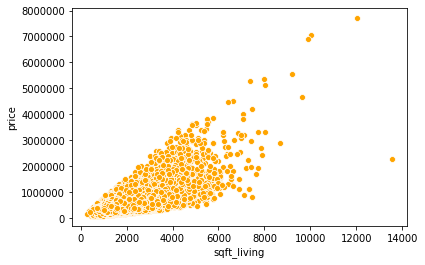

In [68]:
sns.scatterplot(x=df['sqft_living'], y=df['price'],color='orange')

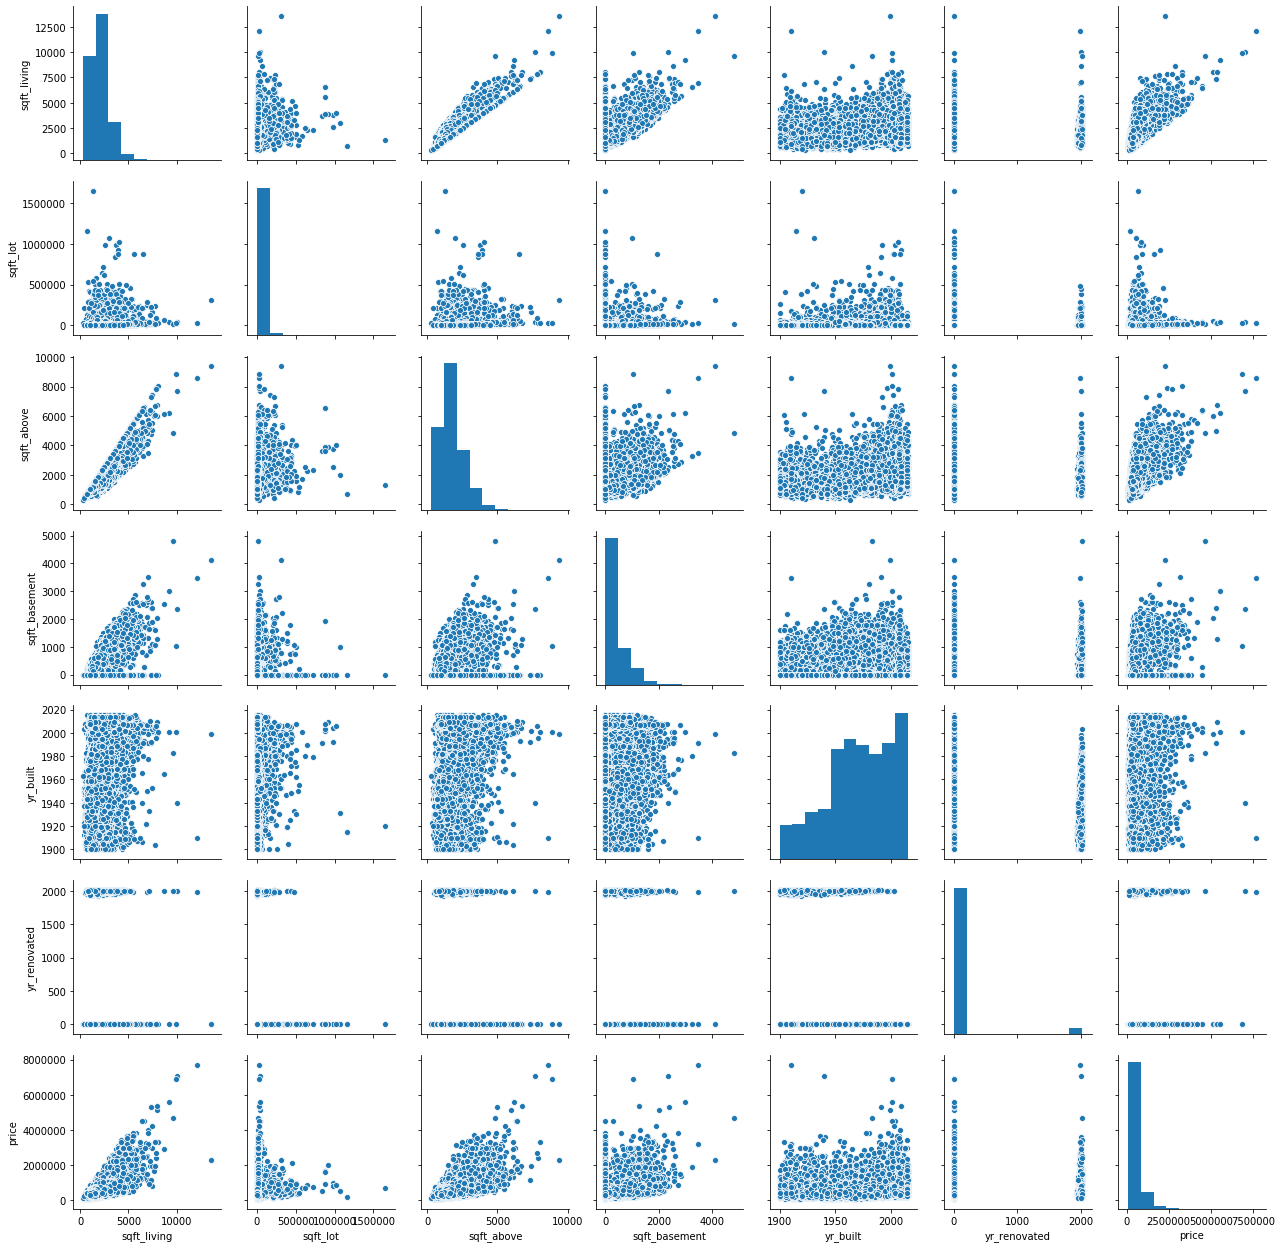

In [69]:
# Pairplot allows to quickly determine correlation hints
cols_num = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','price']
sns.pairplot(df[cols_num])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6db6f58a58>,
      dtype=object)

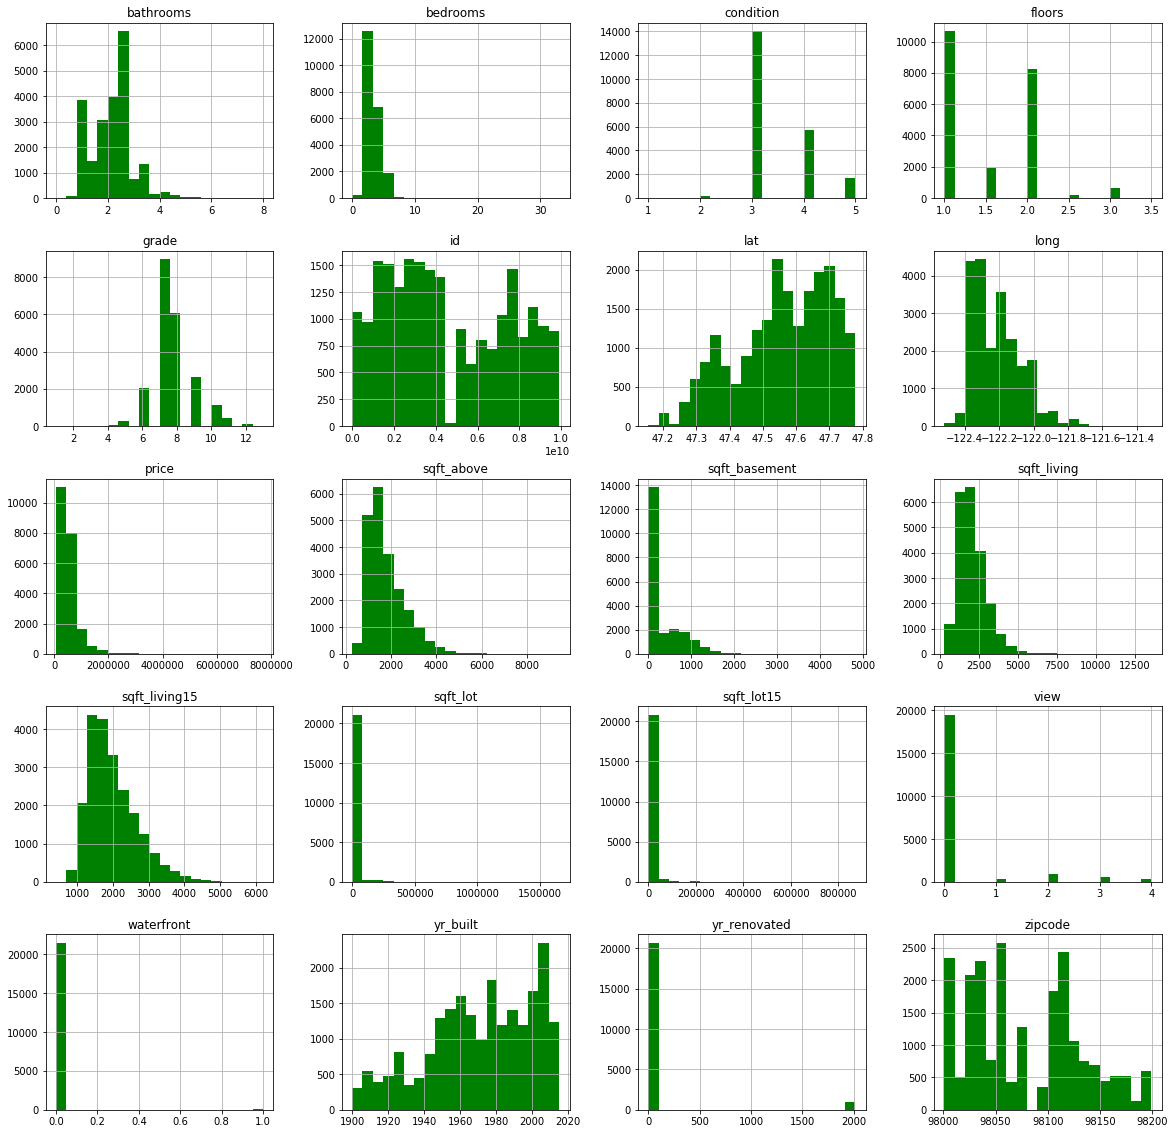

In [70]:
df.hist(bins=20, figsize=(20,20), color='green')

In [0]:
corr = df.corr()

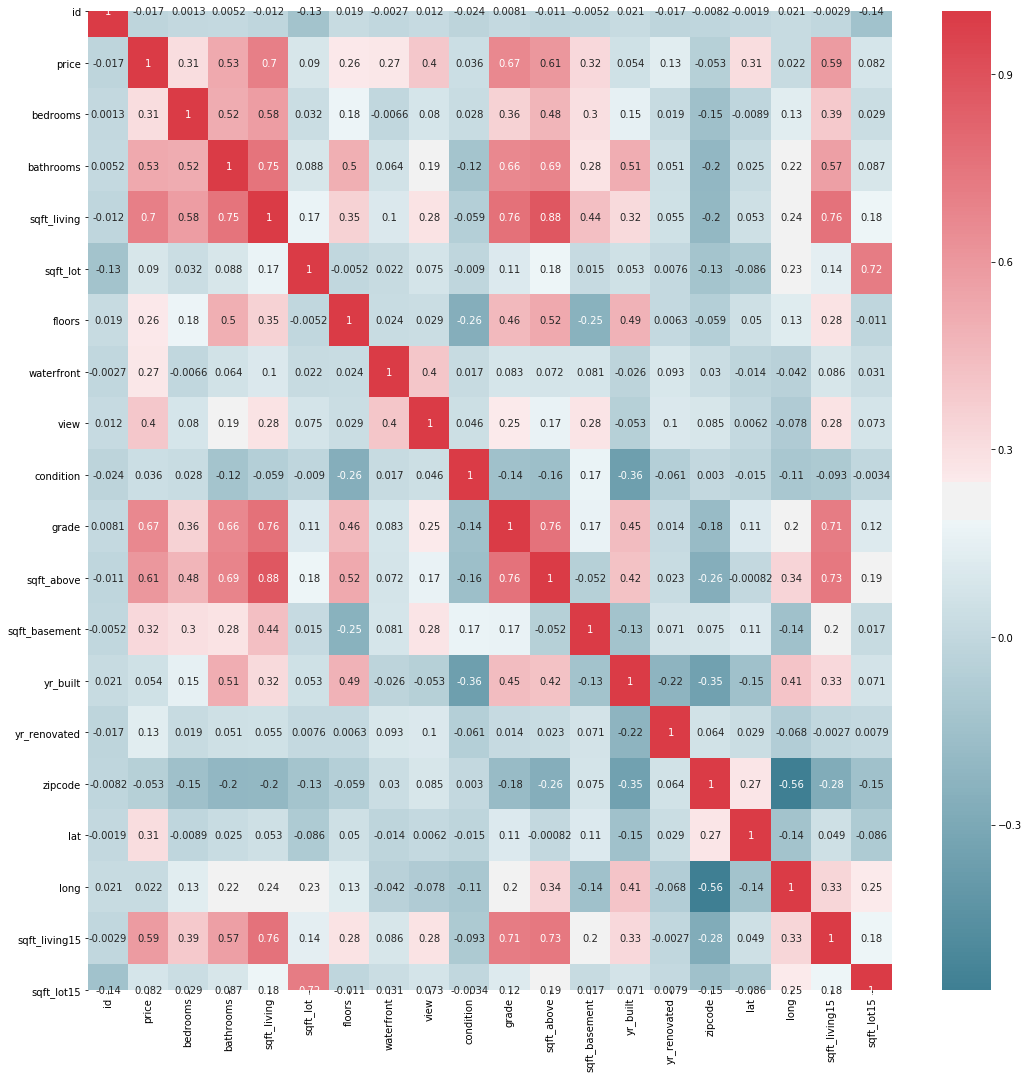

In [72]:
plt.figure(figsize=(18,18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,annot=True)

In [0]:
# The price is strongly positively correlated with sqft_living and grade, 
# as well as medium-correlated with renovations in 2015, number of bathrooms, 
# and sqft_above. It doesn't seem to be strongly correlated with other measures. 


## Step 3: Data Cleaning /Create Testing and Training Data

#### 3.1 Just selected features first

In [0]:
cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
X = df[cols]
y = df['price']

In [74]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [75]:
print(X.shape,y.shape)

(21613, 7) (21613,)


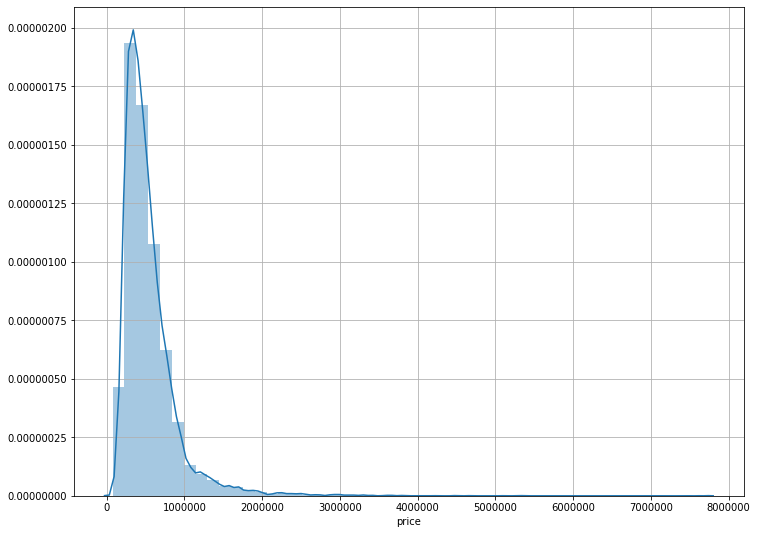

In [76]:
plt.figure(figsize=(12,9))
sns.distplot(y)
plt.grid(1)

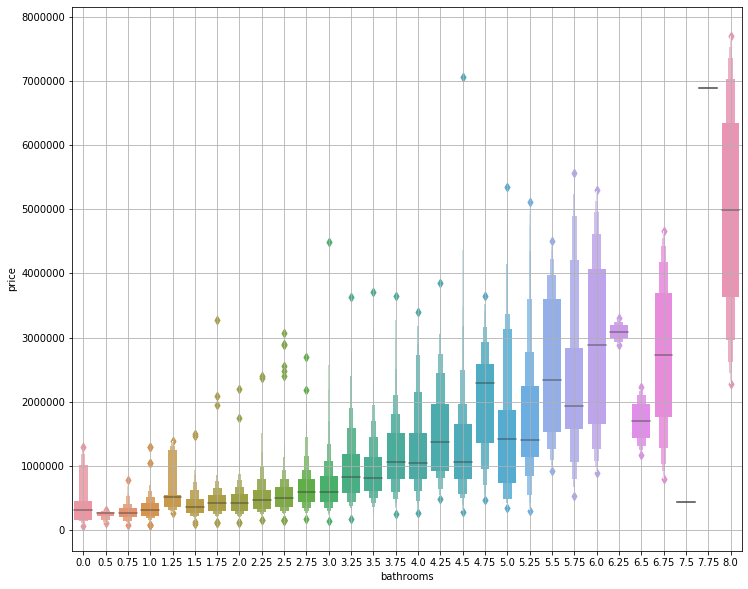

In [77]:
plt.figure(figsize=(12,10))
sns.boxenplot(x=df['bathrooms'], y=df['price'])
plt.grid(1)

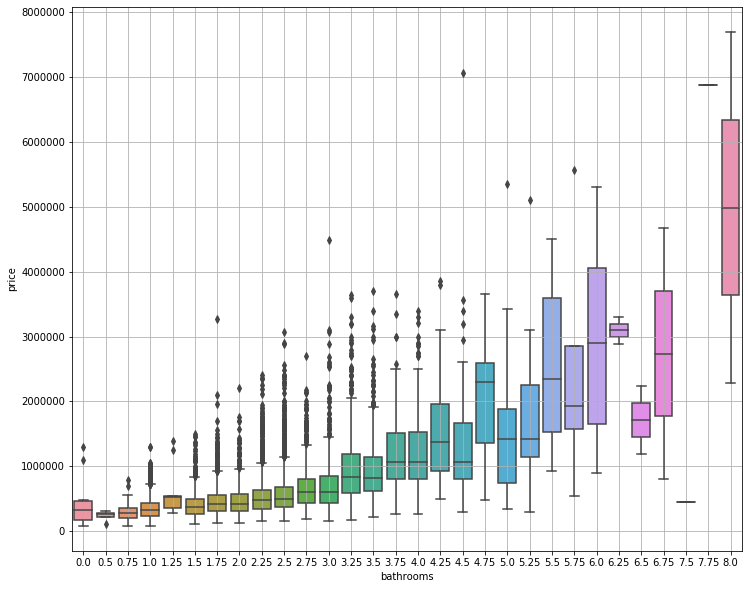

In [78]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.grid(1)

In [0]:
#plt.figure(figsize=(20,10))
#sns.violinplot(x=df['bathrooms'], y=df['price'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
print(X_train.shape,y_train.shape)

(17290, 7) (17290,)


# Train the model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape = (7,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [29]:
# Training
epochs_history = model.fit(X_train, y_train, epochs = 100, batch_size=50,validation_split=0.2)

Train on 13832 samples, validate on 3458 samples
Epoch 1/100
13832/13832 [==============================] - 2s 136us/sample - loss: 241319930404.4234 - val_loss: 66125882941.8901
Epoch 2/100
13832/13832 [==============================] - 1s 104us/sample - loss: 70006984063.1857 - val_loss: 64512437303.0792
Epoch 3/100
13832/13832 [==============================] - 1s 105us/sample - loss: 69216833816.1342 - val_loss: 64259003522.8872
Epoch 4/100
13832/13832 [==============================] - 1s 107us/sample - loss: 69265632539.0954 - val_loss: 64136093491.0816
Epoch 5/100
13832/13832 [==============================] - 1s 105us/sample - loss: 69535235446.3019 - val_loss: 68417620671.5928
Epoch 6/100
13832/13832 [==============================] - 1s 104us/sample - loss: 68924818515.5072 - val_loss: 65988404181.9503
Epoch 7/100
13832/13832 [==============================] - 1s 105us/sample - loss: 69196722026.1608 - val_loss: 64518934298.2071
Epoch 8/100
13832/13832 [======================

### Evaluate the model

In [30]:
epochs_history.history.keys()

dict_keys(['loss', 'val_loss'])

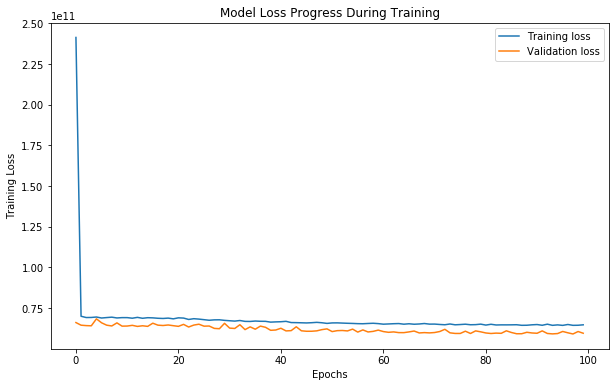

In [31]:
plt.figure(figsize=(10,6))
plt.plot(epochs_history.history['loss'], label='Training loss')
plt.plot(epochs_history.history['val_loss'], label = 'Validation loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

No handles with labels found to put in legend.


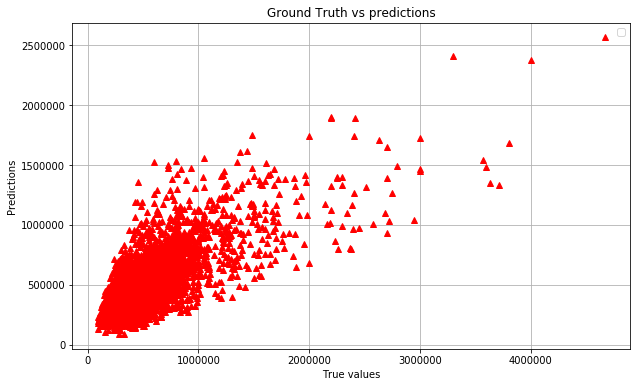

In [32]:
# Prediction
plt.figure(figsize=(10,6))
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '^', color='r')
plt.title('Ground Truth vs predictions')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.grid(1)
plt.legend()

In [0]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [0]:
k = X_test.shape[1]
n = len(X_test)

In [0]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '0.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# r2 has a limitation as it increases with addition of independent variables. 
# Adj_r2 punishes adding an independent variable which does not improve the model
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [36]:
print('RMSE', RMSE, '\nMSE', MSE, '\nr2', r2, '\nadj_r2', adj_r2)

RMSE 252296.341 
MSE 63653443878.954895 
r2 0.5243979304164885 
adj_r2 0.5236263859235373


In [0]:
# not great results !!

#### 3.2 Increase the number of independent features

In [0]:
#Dealing with categorical features
cols_cat =['floors','waterfront','view','condition','grade','yr_renovated']
df_cat = df[cols_cat]

In [0]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
OHencoder = OneHotEncoder(categories='auto')

In [0]:
df_cat = OHencoder.fit_transform(df_cat).toarray()

In [41]:
df_cat[0:1]

array([[1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [42]:
# Before concatenating, reset index on bike_numerical
df_cat = pd.DataFrame(df_cat)
df_cat = df_cat.reset_index()
df_cat.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df[cols_cat]

,floors,waterfront,view,condition,grade,yr_renovated
0,1.0,0,0,3,7,0
1,2.0,0,0,3,7,1991
2,1.0,0,0,3,6,0
3,1.0,0,0,5,7,0
4,1.0,0,0,3,8,0
...,...,...,...,...,...,...
21608,3.0,0,0,3,8,0
21609,2.0,0,0,3,8,0
21610,2.0,0,0,3,7,0
21611,2.0,0,0,3,8,0


In [0]:
# the rest of the original dataframe:
df_num = df.drop(['floors','waterfront','view','condition','grade','yr_renovated'], axis=1)

In [45]:
df_num.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,770,0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1680,0,1987,98074,47.6168,-122.045,1800,7503


In [46]:
# Final dataframe
df_f = pd.concat([df_cat, df_num], axis=1)
df_f.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5631500400,20150225T000000,180000.0,2,1.00,770,10000,770,0,1933,98028,47.7379,-122.233,2720,8062
3,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1680,0,1987,98074,47.6168,-122.045,1800,7503


In [47]:
df_f.shape

(21613, 116)

In [48]:
# remove non-relevant ('date' string will interfere with training)
X = df_f.drop(['price','id','date','zipcode','lat','long'], axis=1)
X.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.00,1180,5650,1180,0,1955,1340,5650
1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.25,2570,7242,2170,400,1951,1690,7639
2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.00,770,10000,770,0,1933,2720,8062
3,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.00,1960,5000,1050,910,1965,1360,5000
4,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.00,1680,8080,1680,0,1987,1800,7503


In [49]:
y = df_f['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [51]:
print(X_test.shape, y_test.shape)

(4323, 110) (4323,)


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape = (110,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               11100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 31,401
Trainable params: 31,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [55]:
# Training
epochs_history = model.fit(X_train, y_train, epochs = 100, batch_size=50,validation_split=0.2)

Train on 13832 samples, validate on 3458 samples
Epoch 1/100
13832/13832 [==============================] - 2s 124us/sample - loss: 197383219277.2886 - val_loss: 76981818177.8878
Epoch 2/100
13832/13832 [==============================] - 1s 106us/sample - loss: 75571367276.8259 - val_loss: 63656861513.5870
Epoch 3/100
13832/13832 [==============================] - 1s 107us/sample - loss: 70030192482.7577 - val_loss: 60759353965.8624
Epoch 4/100
13832/13832 [==============================] - 2s 111us/sample - loss: 68011179867.6507 - val_loss: 59964411302.2741
Epoch 5/100
13832/13832 [==============================] - 1s 107us/sample - loss: 66985070820.0162 - val_loss: 59491908049.5084
Epoch 6/100
13832/13832 [==============================] - 2s 111us/sample - loss: 66803575362.9242 - val_loss: 59256337555.4702
Epoch 7/100
13832/13832 [==============================] - 2s 109us/sample - loss: 65762476721.9711 - val_loss: 59133004191.7594
Epoch 8/100
13832/13832 [======================

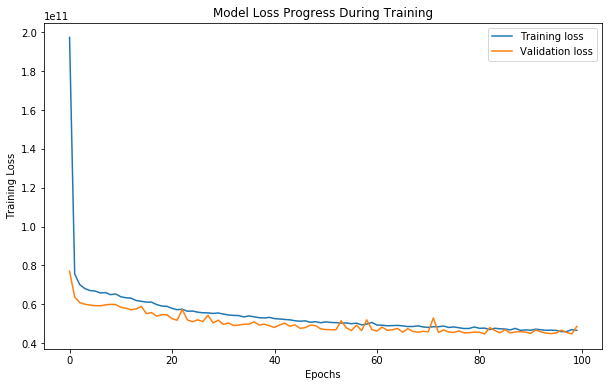

In [56]:
plt.figure(figsize=(10,6))
plt.plot(epochs_history.history['loss'], label='Training loss')
plt.plot(epochs_history.history['val_loss'], label = 'Validation loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

No handles with labels found to put in legend.


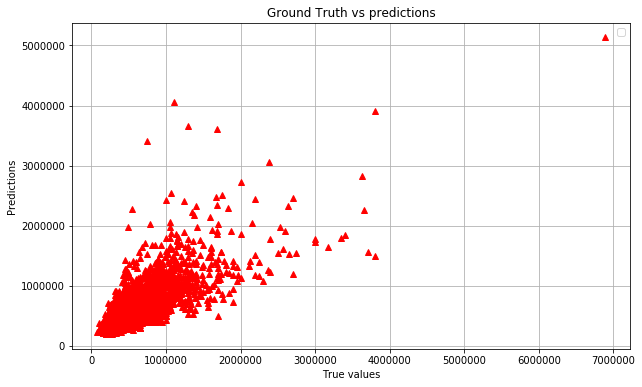

In [57]:
# Prediction
plt.figure(figsize=(10,6))
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '^', color='r')
plt.title('Ground Truth vs predictions')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.grid(1)
plt.legend()

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '0.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# r2 has a limitation as it increases with addition of independent variables. 
# Adj_r2 punishes adding an independent variable which does not improve the model
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE', RMSE, '\nMSE', MSE, '\nr2', r2, '\nadj_r2', adj_r2)

RMSE 242234.449 
MSE 58677528049.58101 
r2 0.5445658472073347 
adj_r2 0.5326717928846392


In [0]:
# a bit better 